In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.layers import Dense, Convolution2D, MaxPooling2D, Activation, Flatten
from keras.layers import Reshape, UpSampling2D, ZeroPadding2D, Input
from keras.models import Sequential, Model

Using TensorFlow backend.


In [2]:
data_path = '../../Dataset/JPEGImages/'

In [3]:
ims = os.listdir(data_path)

select_ims = []
for ix in range(4000):
    if '.jpg' in ims[ix]:
        img = cv2.imread(data_path + ims[ix])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))
        select_ims.append(img)
print len(select_ims)

4000


In [4]:
data = np.asarray(select_ims)
print data.shape

(4000, 64, 64, 3)


In [5]:
# save dataset
# np.save('image_data', data)

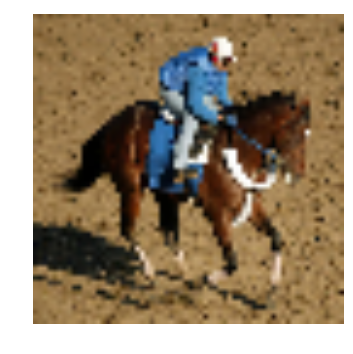

In [6]:
nx = 12
plt.figure(0)
plt.axis("off")
plt.imshow(data[nx])

plt.show()

In [20]:
split = int(0.8 * data.shape[0])

X_train = data[:split]/255.0
X_val = data[split:]/255.0
y_train = y[:split]/255.0
y_val = y[split:]/255.0

print X_train.shape, X_val.shape
print X_train.mean()

(3200, 64, 64, 3) (800, 64, 64, 3)
0.432566064473


In [19]:
y = np.zeros((data.shape[0], data.shape[1], data.shape[2], 1))

for ix in range(y.shape[0]):
    y[ix] = cv2.cvtColor(data[ix], cv2.COLOR_RGB2GRAY).reshape((64, 64, 1))

print y.shape, y.mean()

(4000, 64, 64, 1) 111.899672302


In [30]:
model = Sequential()

model.add(Convolution2D(64, 3, 3, input_shape=(64, 64, 1), activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 5, 5, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))

# Decode
model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(2, 2)))
model.add(Convolution2D(64, 5, 5, border_mode='same', activation='relu'))

model.add(UpSampling2D(size=(2, 2)))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(3, 3, 3, border_mode='same', activation='relu'))

model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_17 (Convolution2D) (None, 62, 62, 64)    640         convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
convolution2d_18 (Convolution2D) (None, 60, 60, 128)   73856       convolution2d_17[0][0]           
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 30, 30, 128)   0           convolution2d_18[0][0]           
____________________________________________________________________________________________________
convolution2d_19 (Convolution2D) (None, 26, 26, 32)    102432      maxpooling2d_3[0][0]             
___________________________________________________________________________________________

In [31]:
hist = model.fit(y_train, X_train,
                nb_epoch=15,
                shuffle=True,
                validation_data=(y_val, X_val), verbose=2)

Train on 3200 samples, validate on 800 samples
Epoch 1/15
23s - loss: 0.0462 - acc: 0.4607 - val_loss: 0.0224 - val_acc: 0.5221
Epoch 2/15
22s - loss: 0.0211 - acc: 0.5109 - val_loss: 0.0189 - val_acc: 0.5242
Epoch 3/15
22s - loss: 0.0185 - acc: 0.5082 - val_loss: 0.0173 - val_acc: 0.5029
Epoch 4/15
22s - loss: 0.0166 - acc: 0.5050 - val_loss: 0.0155 - val_acc: 0.4533
Epoch 5/15
22s - loss: 0.0163 - acc: 0.5077 - val_loss: 0.0149 - val_acc: 0.5352
Epoch 6/15
22s - loss: 0.0148 - acc: 0.5059 - val_loss: 0.0142 - val_acc: 0.4620
Epoch 7/15
22s - loss: 0.0143 - acc: 0.5041 - val_loss: 0.0141 - val_acc: 0.4741
Epoch 8/15
22s - loss: 0.0137 - acc: 0.5038 - val_loss: 0.0133 - val_acc: 0.4833
Epoch 9/15
23s - loss: 0.0135 - acc: 0.5044 - val_loss: 0.0128 - val_acc: 0.5208
Epoch 10/15
22s - loss: 0.0134 - acc: 0.5077 - val_loss: 0.0124 - val_acc: 0.4751
Epoch 11/15
22s - loss: 0.0128 - acc: 0.5067 - val_loss: 0.0121 - val_acc: 0.4834
Epoch 12/15
22s - loss: 0.0125 - acc: 0.5155 - val_loss: 0.0

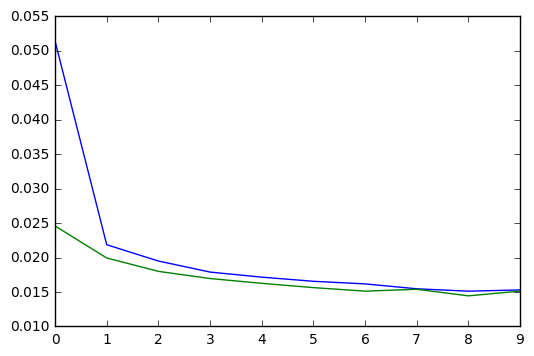

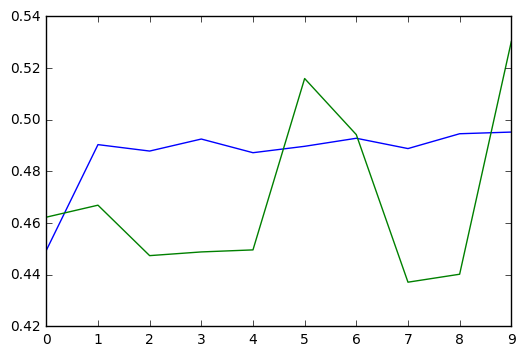

In [23]:
th = hist.history

plt.figure(0)
plt.plot(th['loss'], 'b')
plt.plot(th['val_loss'], 'g')

plt.figure(1)
plt.plot(th['acc'], 'b')
plt.plot(th['val_acc'], 'g')

In [25]:
out = model.predict(y_train[:100])
print out.shape

(100, 64, 64, 3)


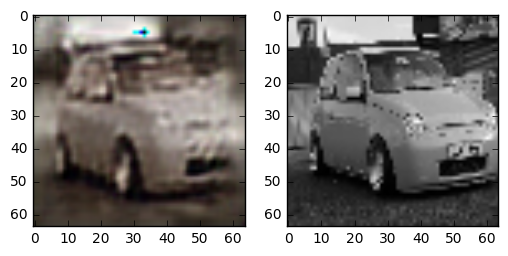

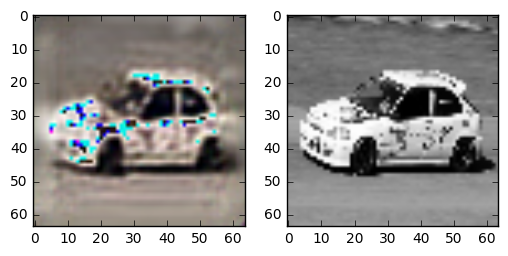

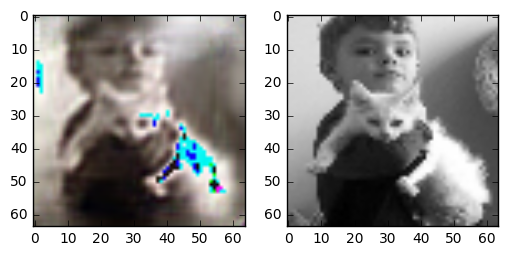

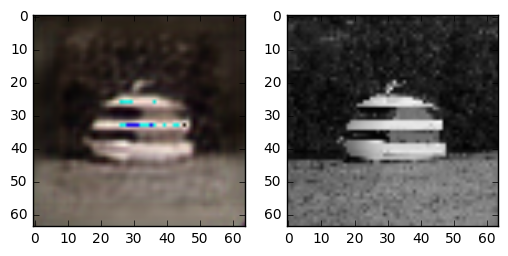

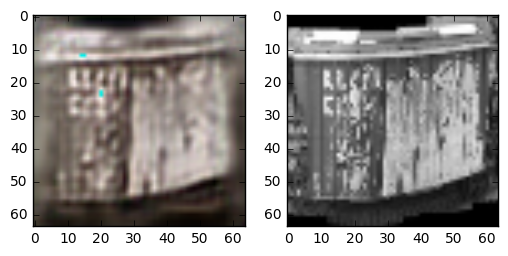

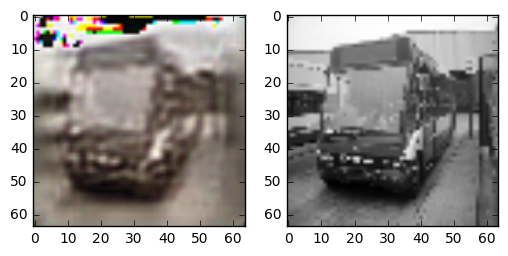

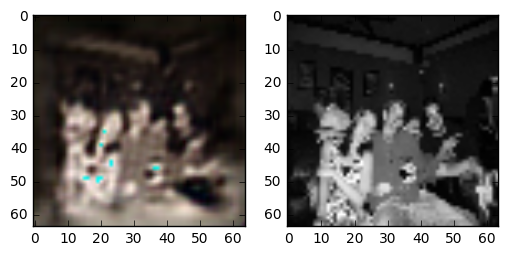

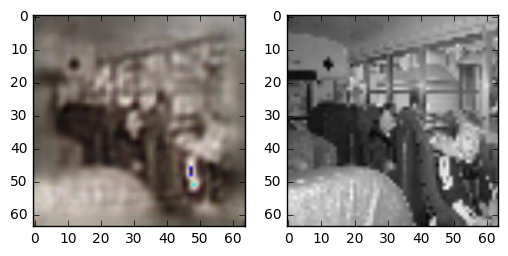

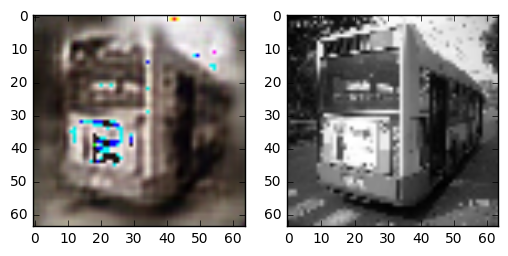

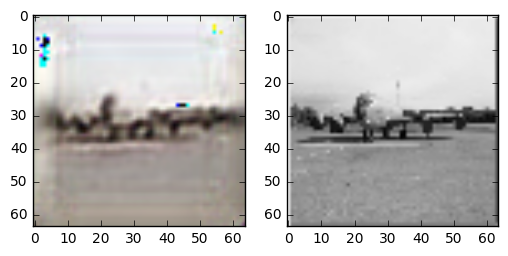

In [29]:
for ix in range(10):
    plt.figure(ix)
    plt.subplot(1, 2, 1)
    plt.imshow(out[ix])
    plt.subplot(1, 2, 2)
    plt.imshow(y_train[ix].reshape(64, 64), cmap='gray')
plt.show()